In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/BB_Prophet/main/TSLA.csv'

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [ ]:
import pandas as pd

In [ ]:
dado = pd.read_csv(url)

In [ ]:
dado.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2758,2021-06-14,612.229980,625.489990,609.179993,617.690002,617.690002,20424000
2759,2021-06-15,616.690002,616.789978,598.229980,599.359985,599.359985,17764100
2760,2021-06-16,597.539978,608.500000,593.500000,604.869995,604.869995,22144100
2761,2021-06-17,601.890015,621.469971,601.340027,616.599976,616.599976,22701400


In [ ]:
dado['Date'] = pd.to_datetime(dado['Date'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

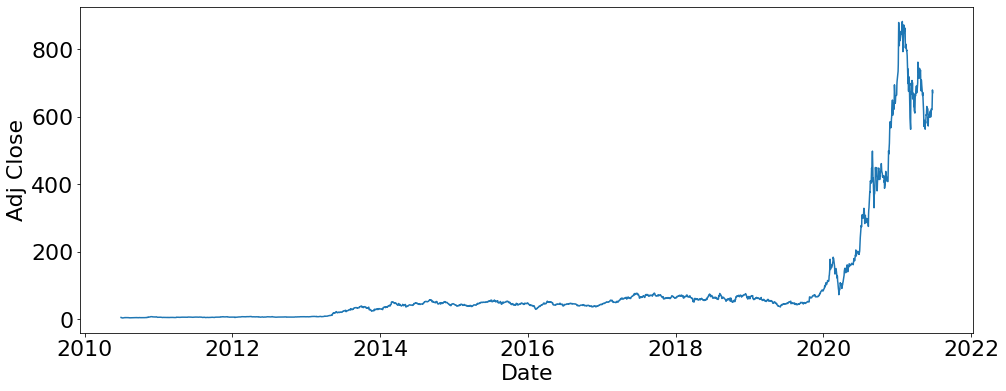

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='Date', y='Adj Close', data=dado)

In [ ]:
from pandas.plotting import autocorrelation_plot

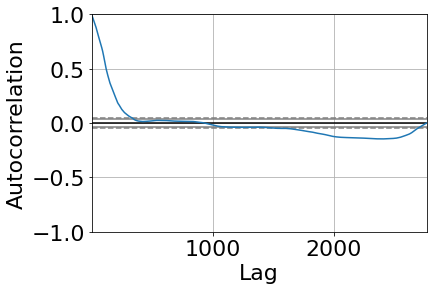

In [ ]:
autocorrelation_plot(dado['Adj Close'])

!['Correlação cruzada'](https://robosub.eecs.wsu.edu/wiki/lib/exe/fetch.php?tok=aa8260&media=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FVVPKOXc6aY1Lq%2Fsource.gif)

Fonte: https://robosub.eecs.wsu.edu/wiki/ee/hydrophones/start

In [ ]:
dado.shape

(2768, 7)

In [ ]:
df = pd.DataFrame()
df_teste = pd.DataFrame()

In [ ]:
df['ds'] = dado['Date'][:2700]
df_teste['ds'] = dado['Date'][2700:]

In [ ]:
df.head()

,ds
0,2010-06-29
1,2010-06-30
2,2010-07-01
3,2010-07-02
4,2010-07-06


In [ ]:
df['y'] = dado['Adj Close'][:2700]
df_teste['y'] = dado['Adj Close'][2700:]

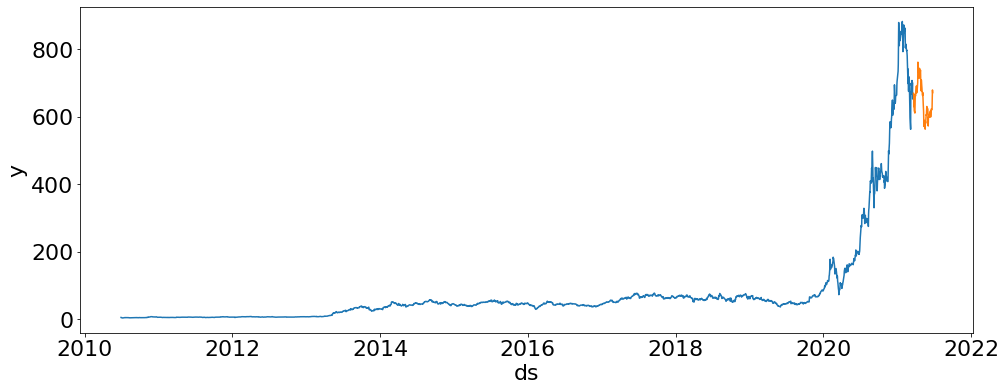

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='ds', y='y', data=df)
sns.lineplot(x='ds', y='y', data=df_teste)

In [ ]:
from fbprophet import Prophet

In [ ]:
modelo = Prophet()

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=100,freq='D')

In [ ]:
dataframefuturo.head(-68)

,ds
0,2010-06-29
1,2010-06-30
2,2010-07-01
3,2010-07-02
4,2010-07-06
...,...
2727,2021-04-16
2728,2021-04-17
2729,2021-04-18
2730,2021-04-19


In [ ]:
previsao = modelo.predict(dataframefuturo)

In [ ]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,1.043540,-89.376668,59.278491,1.043540,1.043540,-11.606478,-11.606478,-11.606478,-0.856251,-0.856251,-0.856251,-10.750227,-10.750227,-10.750227,0.0,0.0,0.0,-10.562938
1,2010-06-30,1.056768,-78.983284,65.214232,1.056768,1.056768,-10.568023,-10.568023,-10.568023,-0.265408,-0.265408,-0.265408,-10.302615,-10.302615,-10.302615,0.0,0.0,0.0,-9.511255
2,2010-07-01,1.069996,-77.389137,62.185222,1.069996,1.069996,-10.534964,-10.534964,-10.534964,-0.703701,-0.703701,-0.703701,-9.831263,-9.831263,-9.831263,0.0,0.0,0.0,-9.464968
3,2010-07-02,1.083224,-85.375138,64.564008,1.083224,1.083224,-10.692096,-10.692096,-10.692096,-1.349845,-1.349845,-1.349845,-9.342251,-9.342251,-9.342251,0.0,0.0,0.0,-9.608871
4,2010-07-06,1.136137,-80.711506,61.822738,1.136137,1.136137,-8.206557,-8.206557,-8.206557,-0.856251,-0.856251,-0.856251,-7.350306,-7.350306,-7.350306,0.0,0.0,0.0,-7.070420


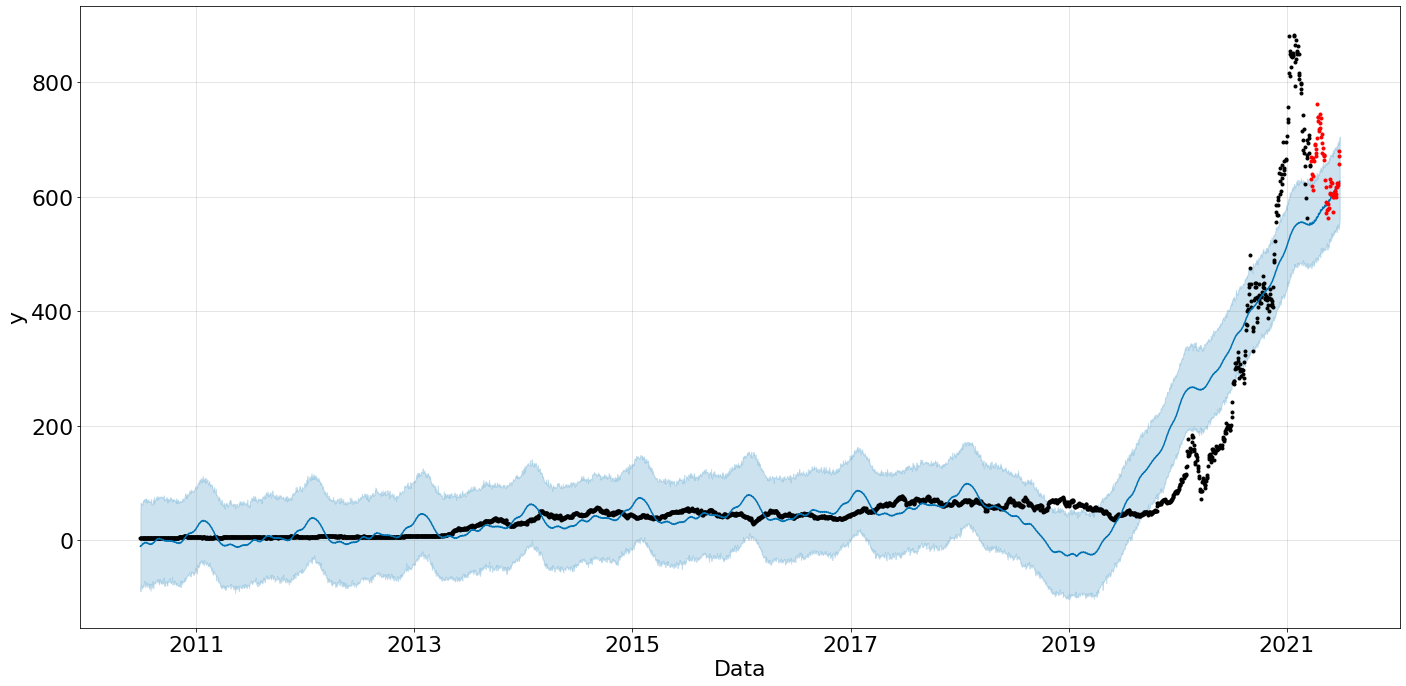

In [ ]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='y', figsize=(20,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

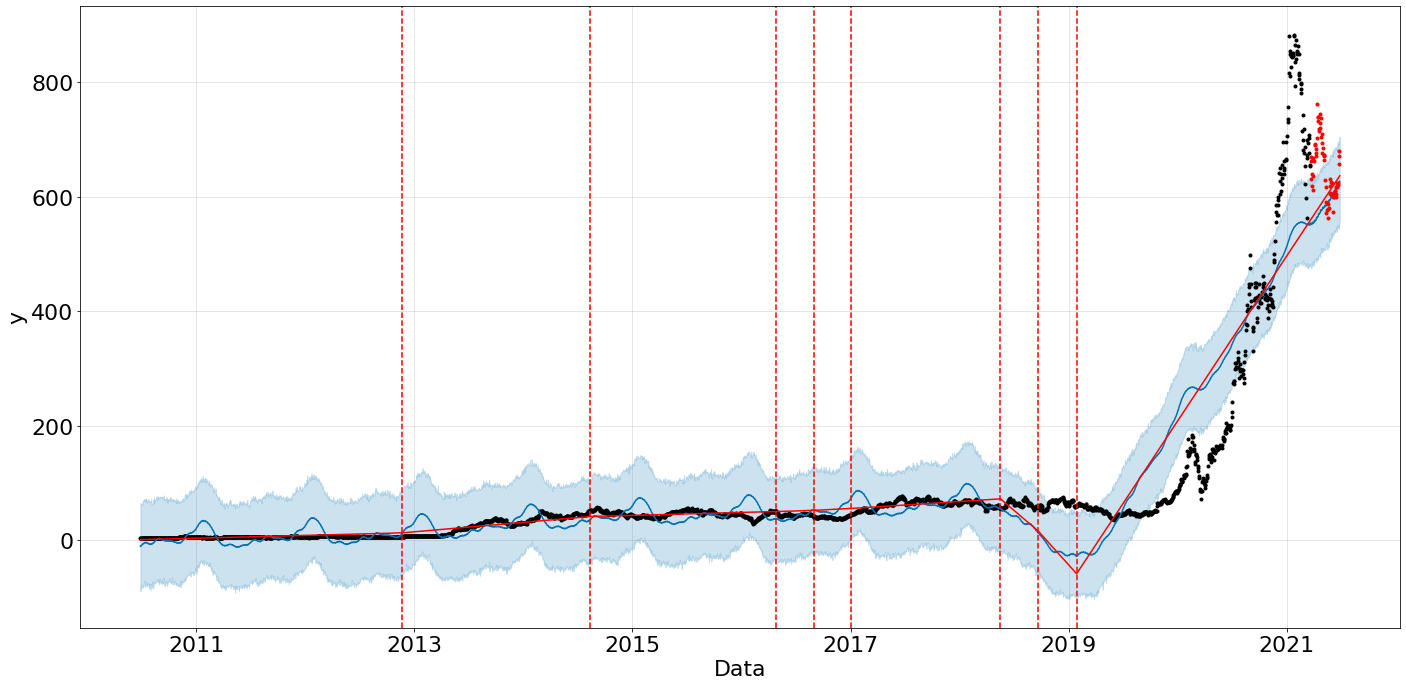

In [ ]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='y', figsize=(20,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [ ]:
modelo = Prophet( changepoints=['2020-03-01'], seasonality_mode='multiplicative',weekly_seasonality=False) #changepoints=['2020-03-01'],
modelo.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=100)
previsao = modelo.predict(dataframefuturo)

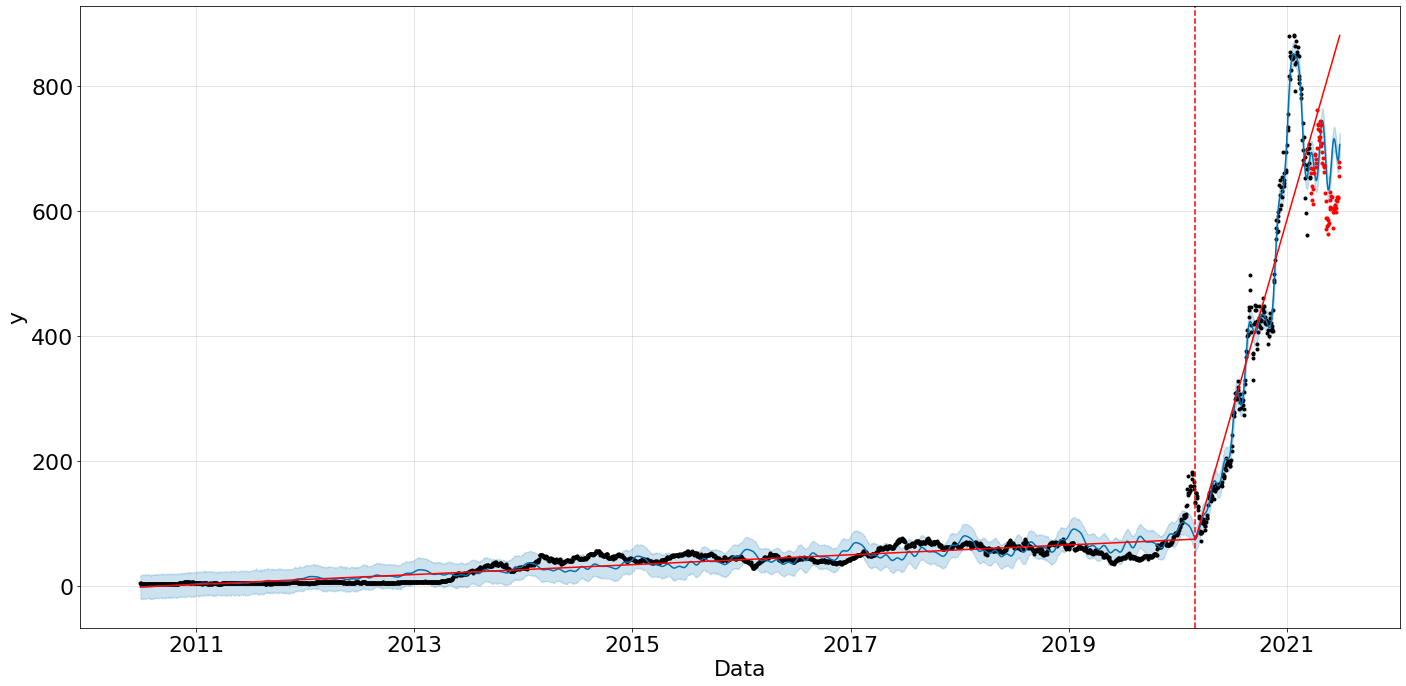

In [ ]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='y', figsize=(20,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

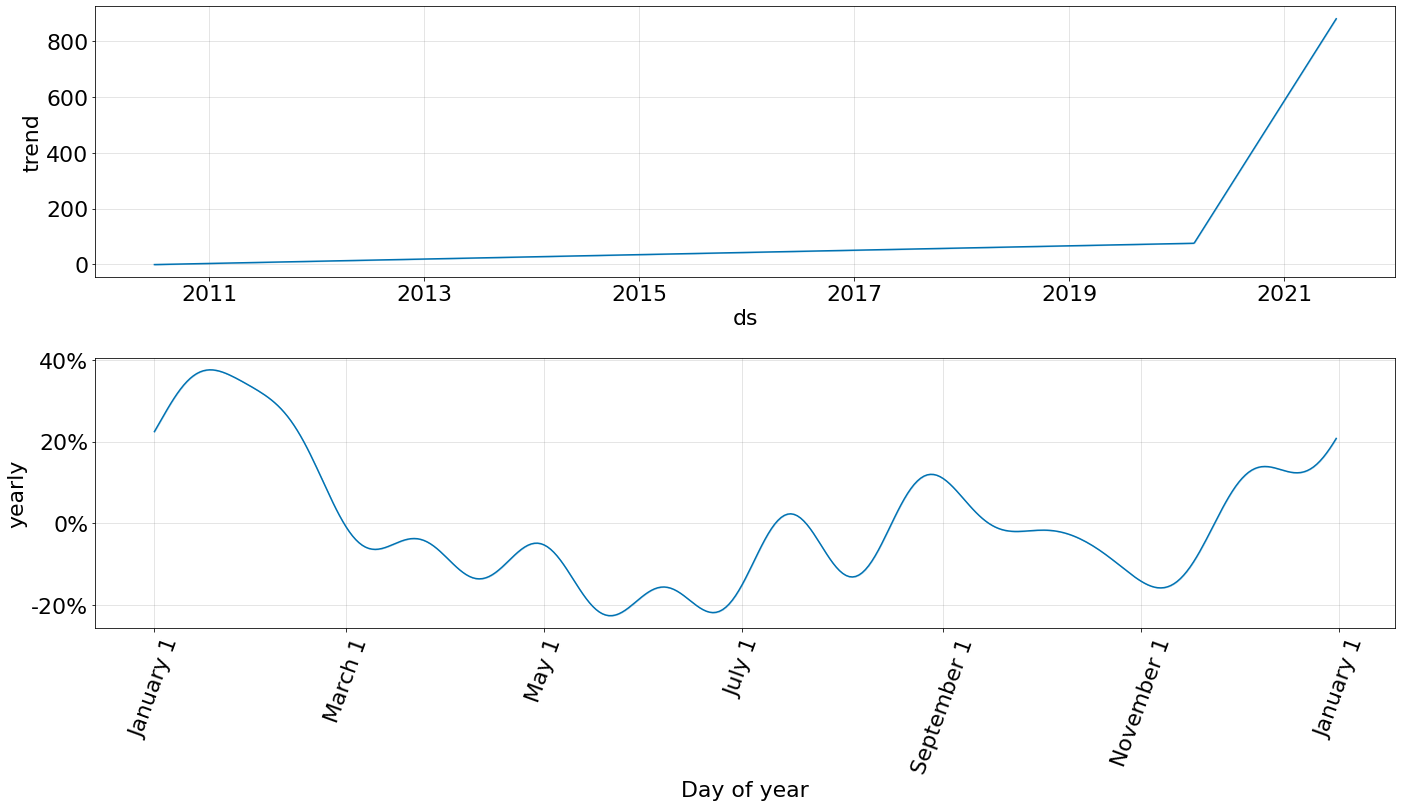

In [ ]:
modelo.plot_components(previsao, figsize=(20,10))
plt.xticks(rotation='70'); #olhar rotação

## Intervalo de confiança

In [ ]:
amostras = modelo.predictive_samples(previsao)

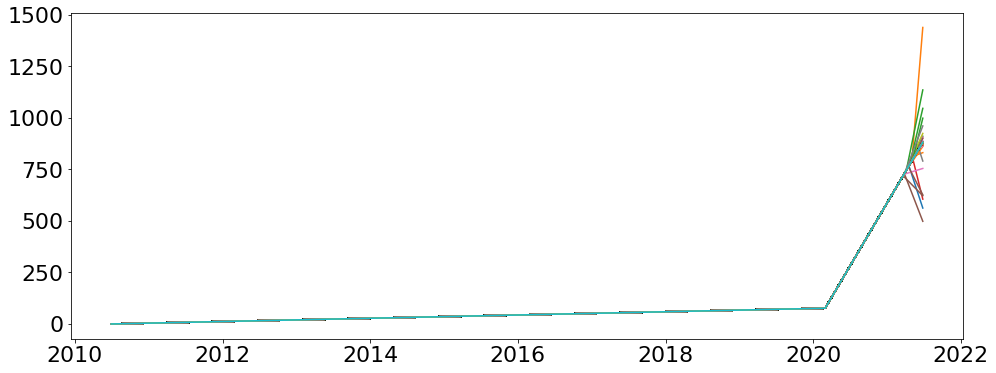

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(previsao['ds'],amostras['trend']);


## Validação

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(modelo, initial='720 days', period='360 days', horizon = '360 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2013-04-30 00:00:00 and 2020-03-24 00:00:00


In [ ]:
df_cv['cutoff'].unique()

array(['2013-04-30T00:00:00.000000000', '2014-04-25T00:00:00.000000000',
       '2015-04-20T00:00:00.000000000', '2016-04-14T00:00:00.000000000',
       '2017-04-09T00:00:00.000000000', '2018-04-04T00:00:00.000000000',
       '2019-03-30T00:00:00.000000000', '2020-03-24T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
janela = 7 #mudar o valor da janela para verificar as janelas utilizadas para a validação dos resultados. 

In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

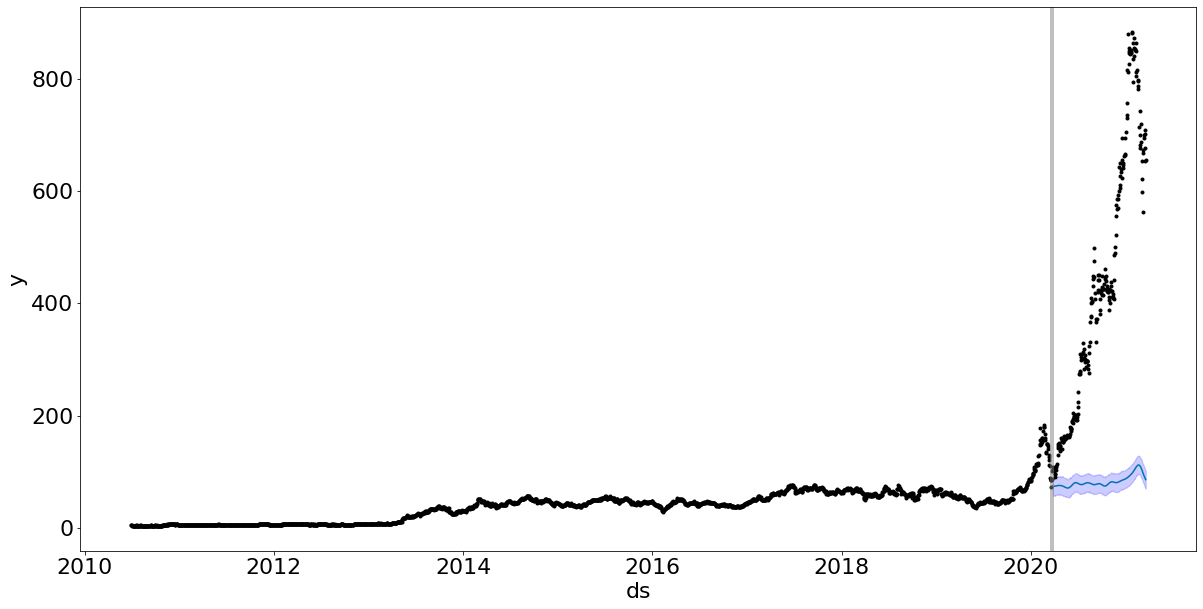

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_p = performance_metrics(df_cv)

In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,532.061682,23.066462,15.715772,0.284758,0.261655,0.377104
1,37 days,563.846239,23.745447,16.151088,0.290472,0.276043,0.373737
2,38 days,584.760352,24.181819,16.491948,0.295931,0.297123,0.370370
3,39 days,585.562966,24.198408,16.565042,0.297971,0.309157,0.370707
4,40 days,588.617179,24.261434,16.709778,0.301043,0.312831,0.361111
...,...,...,...,...,...,...,...
320,356 days,48831.683283,220.978920,92.987565,0.341612,0.211658,0.479798
321,357 days,47698.926524,218.400839,91.809942,0.338474,0.211658,0.481481
322,358 days,46931.114547,216.635903,91.173193,0.337241,0.212417,0.481481
323,359 days,45917.382900,214.283417,90.217367,0.335737,0.212417,0.477778


#Artigos na alura sobre séries temporais

https://www.alura.com.br/artigos/modelos-matematicos-utilizados-em-series-temporais

https://www.alura.com.br/artigos/series-temporais-e-suas-aplicacoes

https://www.alura.com.br/artigos/series-temporais-tipos-de-sazonalidade

https://www.alura.com.br/artigos/metricas-de-avaliacao-para-series-temporais


